# testing eqtl benchmark from epcot V2

In [9]:
#testing it in LCLs only as that is one of the cell types, let's see how they load the data

import numpy as np
data = np.loadtxt('/data1/lesliec/sarthak/data/joint_playground/eQTL/EPCOTv2_LCLs/LCLs.txt', dtype=str)
data

array([['0', '0', '10057', ..., 'C', 'G', '-1'],
       ['0', '0', '10057', ..., 'G', 'A', '-1'],
       ['0', '0', '10057', ..., 'A', 'G', '-1'],
       ...,
       ['1', '0', '9854', ..., 'A', 'G', '1'],
       ['1', '0', '9921', ..., 'C', 'T', '-1'],
       ['1', '0', '9933', ..., 'G', 'A', '1']], dtype='<U9')

In [10]:
data.shape

(1331, 11)

In [11]:
#then they do this
remaining_data=np.delete(data,[8,9],axis=1).astype('int')
remaining_data.shape

(1331, 9)

In [12]:
remaining_data #they get rid of the nucleotide information?

array([[        0,         0,     10057, ...,         1,  23953727,
               -1],
       [        0,         0,     10057, ...,         1,  23953798,
               -1],
       [        0,         0,     10057, ...,         1,  23954373,
               -1],
       ...,
       [        1,         0,      9854, ...,         1,  71941892,
                1],
       [        1,         0,      9921, ...,        -1, 111139496,
               -1],
       [        1,         0,      9933, ...,        -1,  29073627,
                1]])

In [13]:
cell_vector = np.full((remaining_data.shape[0], 1), 0)
cell_vector #just makes full array of this shape we can concatenate on

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [14]:
full = np.concatenate((cell_vector, remaining_data), axis=1)
full.shape #logical enough I think, let's looka t a row tho

(1331, 10)

In [ ]:
full[0] #I guess the first indexx is the cell vector, I don't know what the rest of this is tho?

array([       0,        0,        0,    10057,       14, 23953734,
       23969279,        1, 23953727,       -1])

In [ ]:
#he makes a dataset and loader, we don't need this

In [17]:
cell_idx, label, qtl_idx, gene_idx, chrom, gene_start, gene_end, strand, \
        qtl_loc, sign_target = [tmp_x for tmp_x in full]

ValueError: too many values to unpack (expected 10)

In [20]:
import torch
from torch.utils.data import Dataset, DataLoader
class QtlDataset(Dataset):
    def __init__(self,cell,cell_idx):
        self.sample_dir='/data1/lesliec/sarthak/data/joint_playground/eQTL/EPCOTv2_LCLs/'

        self.samples=self.load_samples(cell,cell_idx)
        self.num=self.samples.shape[0]

    def load_samples(self,cell,cell_idx):
        data=np.loadtxt(self.sample_dir+cell+'.txt',dtype='str')

        remaining_data=np.delete(data,[8,9],axis=1).astype('int')
        cell_vector = np.full((remaining_data.shape[0], 1), cell_idx)
        return np.concatenate((cell_vector, remaining_data), axis=1)

    def __getitem__(self, index):
        return self.samples[index]

    def __len__(self):
        return self.num

cell_dataset = QtlDataset('LCLs', 0)
cell_dataset.samples.shape #yup it's as we expect I think

(1331, 10)

In [21]:
test_loader = DataLoader(
            cell_dataset,
            batch_size=1,
            shuffle=False
        )

In [22]:
input_sample_list = next(iter(test_loader))
cell_idx, label, qtl_idx, gene_idx, chrom, gene_start, gene_end, strand, \
        qtl_loc, sign_target = [tmp_x.item() for tmp_x in input_sample_list[0]]

In [ ]:
input_sample_list.shape #so then it becomes just 1 value! It returns just one not the whole thing, that makes sense lol

torch.Size([1, 10])

In [26]:
#so that means we can load in our txt with proper labels this time

import pandas as pd
df = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/eQTL/EPCOTv2_LCLs/LCLs.txt', sep=' ', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,10057,14,23953734,23969279,1,23953727,C,G,-1
1,0,0,10057,14,23953734,23969279,1,23953798,G,A,-1
2,0,0,10057,14,23953734,23969279,1,23954373,A,G,-1
3,0,0,10119,1,2555639,2565382,1,2557169,T,C,1
4,0,0,10119,1,2555639,2565382,1,2568341,G,A,1
...,...,...,...,...,...,...,...,...,...,...,...
1326,1,0,9772,3,12484421,12541549,1,12484507,G,A,1
1327,1,0,9844,14,22773222,22829820,-1,22803905,T,C,1
1328,1,0,9854,9,71911510,71986054,1,71941892,A,G,1
1329,1,0,9921,1,111117163,111140203,-1,111139496,C,T,-1


In [ ]:
#now define names for the columns!
df.columns = ['label', 'qtl_idx', 'gene_idx', 'chrom', 'gene_start', 'gene_end', 'strand', 'qtl_loc', 'ref', 'alt', 'sign_target']
df
#yes this seems quite accurate!

,label,qtl_idx,gene_idx,chrom,gene_start,gene_end,strand,qtl_loc,ref,alt,sign_target
0,0,0,10057,14,23953734,23969279,1,23953727,C,G,-1
1,0,0,10057,14,23953734,23969279,1,23953798,G,A,-1
2,0,0,10057,14,23953734,23969279,1,23954373,A,G,-1
3,0,0,10119,1,2555639,2565382,1,2557169,T,C,1
4,0,0,10119,1,2555639,2565382,1,2568341,G,A,1
...,...,...,...,...,...,...,...,...,...,...,...
1326,1,0,9772,3,12484421,12541549,1,12484507,G,A,1
1327,1,0,9844,14,22773222,22829820,-1,22803905,T,C,1
1328,1,0,9854,9,71911510,71986054,1,71941892,A,G,1
1329,1,0,9921,1,111117163,111140203,-1,111139496,C,T,-1


In [ ]:
#let's now check to see if this matches
#also I guess these are only test ones? A little bit unsure, maybe they train on some tissues and test on the others?

In [28]:
genome_np = '/data1/lesliec/sarthak/data/chrombpnet_test/hg38_tokenized.npz'
with np.load(genome_np) as data:
    genome = {key: np.array(data[key]) for key in data}

In [ ]:
#let's go through these to check
genome['chr14'][23953727-1] #yeah it's a C

8

In [33]:
for i in range(df.shape[0]):
    temp = df.iloc[i]
    chrom = temp['chrom']
    pos = temp['qtl_loc'] - 1  # Convert to zero-based index
    ref = temp['ref']
    print(f"reference: {ref}, genome: {genome['chr'+str(chrom)][pos]}")

reference: C, genome: 8
reference: G, genome: 9
reference: A, genome: 7
reference: T, genome: 10
reference: G, genome: 9
reference: A, genome: 7
reference: C, genome: 8
reference: T, genome: 10
reference: C, genome: 8
reference: A, genome: 7
reference: C, genome: 8
reference: C, genome: 8
reference: G, genome: 9
reference: G, genome: 9
reference: A, genome: 7
reference: G, genome: 9
reference: A, genome: 7
reference: T, genome: 10
reference: G, genome: 9
reference: C, genome: 8
reference: G, genome: 9
reference: G, genome: 9
reference: G, genome: 9
reference: T, genome: 10
reference: A, genome: 7
reference: C, genome: 8
reference: C, genome: 8
reference: A, genome: 7
reference: C, genome: 8
reference: G, genome: 9
reference: A, genome: 7
reference: C, genome: 8
reference: G, genome: 9
reference: A, genome: 7
reference: A, genome: 7
reference: T, genome: 10
reference: C, genome: 8
reference: G, genome: 9
reference: T, genome: 10
reference: T, genome: 10
reference: C, genome: 8
reference

KeyError: 'chr23'

In [34]:
mapping = {'A': 7, 'C': 8, 'G': 9, 'T': 10, 'N': 11}
for i in range(df.shape[0]):
    temp = df.iloc[i]
    chrom = temp['chrom']
    if chrom == 23:
        print('skipping')
        continue #probably X chromosome, but i don't know if I want to deal with it lol
    pos = temp['qtl_loc'] - 1  # Convert to zero-based index
    ref = temp['ref']
    genome_value = genome['chr'+str(chrom)][pos]
    assert genome_value == mapping[ref], f"Mismatch at index {i}: {genome_value} != {mapping[ref]}"

skipping
skipping
skipping
skipping
skipping
skipping
skipping


In [ ]:
#ok perfect match, now let's find the ones that are chrom 23
mapping = {'A': 7, 'C': 8, 'G': 9, 'T': 10, 'N': 11}
for i in range(df.shape[0]):
    temp = df.iloc[i]
    chrom = temp['chrom']
    if chrom == 23:
        chrom = 'X'
    pos = temp['qtl_loc'] - 1  # Convert to zero-based index
    ref = temp['ref']
    genome_value = genome['chr'+str(chrom)][pos]
    assert genome_value == mapping[ref], f"Mismatch at index {i}: {genome_value} != {mapping[ref]}"
    
#it works!!!!! So we know which ones are reference

In [36]:
#eqtl is tough tho, what if the variant is far from the gene?

#here's how you could load in the TSS
import pickle
base_dir = '/data1/lesliec/sarthak/data/joint_playground/eQTL/EPCOTv2_LCLs/'
with open(base_dir+'genes.pickle', 'rb') as f:
    gene_annotation = pickle.load(f)
ordered_genes = sorted(list(gene_annotation.keys()))

tmpgeneTSS = np.loadtxt(base_dir+'ensemblTSS.txt', dtype='str')
geneTSS_dic = {tmpgeneTSS[i, 0]: int(tmpgeneTSS[i, 1]) for i in range(tmpgeneTSS.shape[0])}
tss_loc=geneTSS_dic[ordered_genes[gene_idx]]

In [38]:
distances = []
for i in range(df.shape[0]):
    temp = df.iloc[i]
    chrom = temp['chrom']
    if chrom == 23:
        chrom = 'X'
    pos = temp['qtl_loc'] - 1  # Convert to zero-based index
    ref = temp['ref']
    
    gene_idx = temp['gene_idx']
    tss_loc = geneTSS_dic[ordered_genes[gene_idx]]
    
    distance = tss_loc - pos
    distances.append(distance)
# Convert distances to a numpy array
distances = np.array(distances)

Text(0.5, 1.0, 'Distribution of Distances of eQTL variant to TSS')

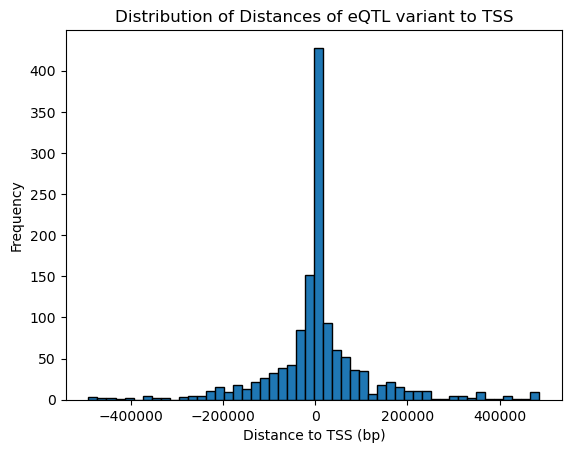

In [41]:
import matplotlib.pyplot as plt
#let's plot it as histogram
plt.hist(distances, bins=50, edgecolor='black')
plt.xlabel('Distance to TSS (bp)')
plt.ylabel('Frequency')
plt.title('Distribution of Distances of eQTL variant to TSS')

In [42]:
#let's see how many are within 524288 bases
max_distance = 524288//2
within_max_distance = np.sum(np.abs(distances) <= max_distance)
print(f"Number of eQTL variants within {max_distance} bases of TSS: {within_max_distance}")
#number outside of it
outside_max_distance = np.sum(np.abs(distances) > max_distance)
print(f"Number of eQTL variants outside {max_distance} bases of TSS: {outside_max_distance}")

Number of eQTL variants within 262144 bases of TSS: 1267
Number of eQTL variants outside 262144 bases of TSS: 64


In [ ]:
#and let's do distance of borzoi predictions
max_distance = 196608//2
within_max_distance = np.sum(np.abs(distances) <= max_distance)
print(f"Number of eQTL variants within {max_distance} bases of TSS: {within_max_distance}")
#number outside of it
outside_max_distance = np.sum(np.abs(distances) > max_distance)
print(f"Number of eQTL variants outside {max_distance} bases of TSS: {outside_max_distance}")

Number of eQTL variants within 98304 bases of TSS: 1023
Number of eQTL variants outside 98304 bases of TSS: 308


In [ ]:
#and the distance of enformer
max_distance = 131072//2
within_max_distance = np.sum(np.abs(distances) <= max_distance)
print(f"Number of eQTL variants within {max_distance} bases of TSS: {within_max_distance}")
#number outside of it
outside_max_distance = np.sum(np.abs(distances) > max_distance)
print(f"Number of eQTL variants outside {max_distance} bases of TSS: {outside_max_distance}")

#this is actually pretty prohibitive, you miss out a lot...

Number of eQTL variants within 65536 bases of TSS: 896
Number of eQTL variants outside 65536 bases of TSS: 435


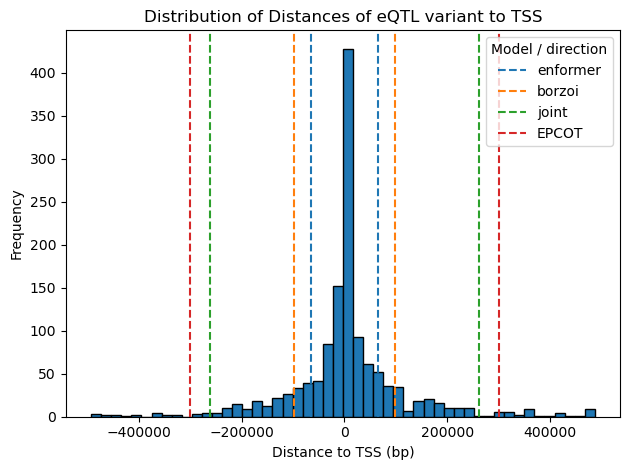

In [49]:
# your histogram
plt.hist(distances, bins=50, edgecolor='black')
plt.xlabel('Distance to TSS (bp)')
plt.ylabel('Frequency')
plt.title('Distribution of Distances of eQTL variant to TSS')

# define your “half‐window” positions and colors
thresholds = {
    'enformer': 131_072 // 2,
    'borzoi':   196_608 // 2,
    'joint':    524_288 // 2,
    'EPCOT':   600_000 // 2,
}
colors = {
    'enformer': 'C0',  # matplotlib default color cycle
    'borzoi':   'C1',
    'joint':    'C2',
    'EPCOT':   'C3',
}

# add the lines
for name, halfwidth in thresholds.items():
    c = colors[name]
    plt.axvline( +halfwidth, color=c, linestyle='--', label=f'{name}')
    plt.axvline( -halfwidth, color=c, linestyle='--')

plt.legend(title='Model / direction')
plt.tight_layout()
plt.show()


In [52]:
#so when we look at something like CAGE seq, it's all mapped to the TSS anyways, let's make sure this makes sense by looking at the GM12878 cage and some examples
#we would expect to see all the alignment of the CAGE seq to the TSS, so let's see if this is the case

# CAGE = np.load('/data1/lesliec/sarthak/data/enformer/data/GM12878CAGE.npz')
#let's now view some of these TSS regions for these cell types

#we have to download CAGE data for GM12878, this way we can get the bigwig tracks and see how encode processing is!
#these are the files we got

#all from same experiment, same replicate!
#https://www.encodeproject.org/files/ENCFF202SEZ/@@download/ENCFF202SEZ.bigWig #minus strand signal of all reads
#https://www.encodeproject.org/files/ENCFF887UWF/@@download/ENCFF887UWF.bigWig #minus strand signal of unique reads
#https://www.encodeproject.org/files/ENCFF105NMY/@@download/ENCFF105NMY.bigWig #plus strand signal of all reads
#https://www.encodeproject.org/files/ENCFF919KDK/@@download/ENCFF919KDK.bigWig #plus strand signal of unique reads

import pyBigWig


In [53]:
#let's start by loading in some of these files. First let's see if we are looking at the plus or minus strand
df.iloc[0]

label                 0
qtl_idx               0
gene_idx          10057
chrom                14
gene_start     23953734
gene_end       23969279
strand                1
qtl_loc        23953727
ref                   C
alt                   G
sign_target          -1
Name: 0, dtype: object

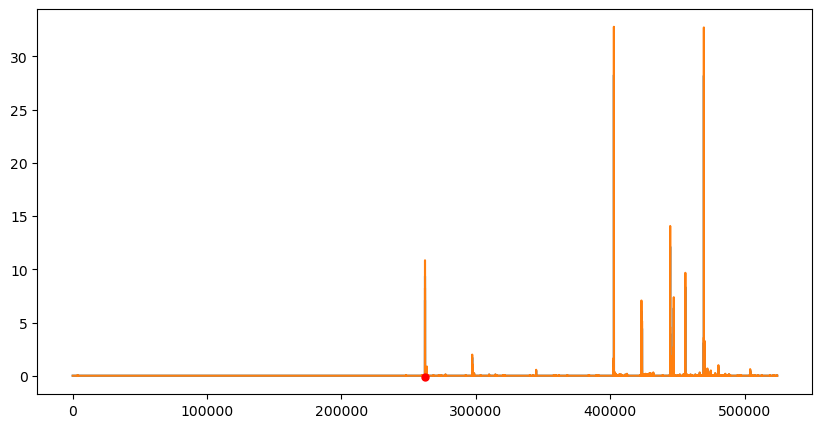

In [ ]:
#this is the positive strand, so let's look at this first
plus_bw = pyBigWig.open('/data1/lesliec/sarthak/data/DK_zarr/bw_files/ENCFF105NMY.bigWig')
plus_bw_unique = pyBigWig.open('/data1/lesliec/sarthak/data/DK_zarr/bw_files/ENCFF919KDK.bigWig')
#now let's load the values
temp = df.iloc[0]
chrom = temp['chrom']
if chrom == 23:
    chrom = 'X'
pos = temp['qtl_loc'] - 1  # Convert to zero-based index
ref = temp['ref']

gene_idx = temp['gene_idx']
tss_loc = geneTSS_dic[ordered_genes[gene_idx]]
#then we'll plot 524288 bases around
start = tss_loc - 524288 // 2
end = tss_loc + 524288 // 2
values = plus_bw.values(f'chr{chrom}', start, end)
values = np.nan_to_num(values)

plt.figure(figsize=(10, 5))
# plt.plot(values, label=f'Gene: {ordered_genes[gene_idx]}')
plt.plot(values, label='positive strand signal of all reads')

values_unique = plus_bw_unique.values(f'chr{chrom}', start, end)
values_unique = np.nan_to_num(values_unique)
plt.plot(values_unique, label='positive strand signal of unique reads')

#now let's demarcate the TSS
plt.plot(tss_loc - start, -.1, color='red', marker='o', markersize=5, label='TSS')

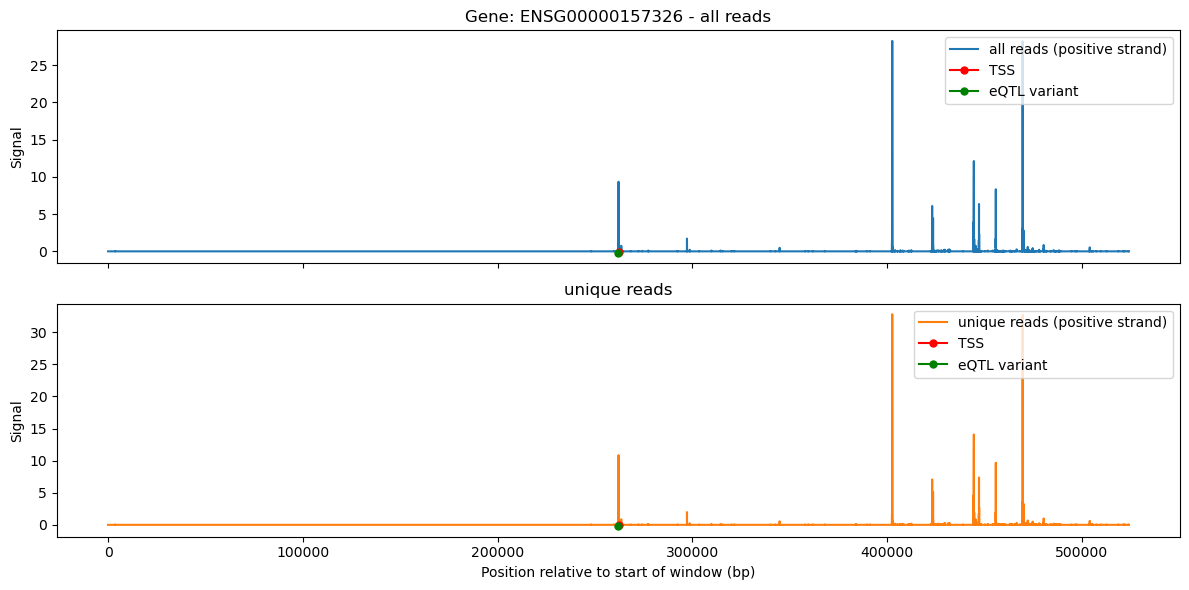

In [72]:
#hard to see, dont' make them overlap

# grab your coordinates from df
temp    = df.iloc[0]
chrom   = 'X' if temp['chrom']==23 else str(temp['chrom'])
pos     = temp['qtl_loc'] - 1
gene_idx= temp['gene_idx']
tss_loc = geneTSS_dic[ordered_genes[gene_idx]]

# define window
halfwin = 524288 // 2
start   = tss_loc - halfwin
end     = tss_loc + halfwin

# load signals
values        = np.nan_to_num(plus_bw.values(f'chr{chrom}', start, end))
values_unique = np.nan_to_num(plus_bw_unique.values(f'chr{chrom}', start, end))

# build subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# top: all reads
axs[0].plot(values,        label='all reads (positive strand)')
axs[0].plot(tss_loc - start, -.1, color='red', marker='o', markersize=5, label='TSS')
axs[0].plot(pos - start, -.2, color='green', marker='o', markersize=5, label='eQTL variant')
axs[0].set_ylabel('Signal')
axs[0].set_title(f'Gene: {ordered_genes[gene_idx]} - all reads')
axs[0].legend(loc='upper right')

# bottom: unique reads
axs[1].plot(values_unique, label='unique reads (positive strand)', color='C1')
axs[1].plot(tss_loc - start, -.1, color='red', marker='o', markersize=5, label='TSS')
axs[1].plot(pos - start, -.2, color='green', marker='o', markersize=5, label='eQTL variant')
axs[1].set_xlabel('Position relative to start of window (bp)')
axs[1].set_ylabel('Signal')
axs[1].set_title('unique reads')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()


In [75]:
np.sign(-3)

-1

In [77]:
plus_bw = pyBigWig.open('/data1/lesliec/sarthak/data/DK_zarr/bw_files/ENCFF105NMY.bigWig')
plus_bw_unique = pyBigWig.open('/data1/lesliec/sarthak/data/DK_zarr/bw_files/ENCFF919KDK.bigWig')
minus_bw = pyBigWig.open('/data1/lesliec/sarthak/data/DK_zarr/bw_files/ENCFF202SEZ.bigWig')
minus_bw_unique = pyBigWig.open('/data1/lesliec/sarthak/data/DK_zarr/bw_files/ENCFF887UWF.bigWig')

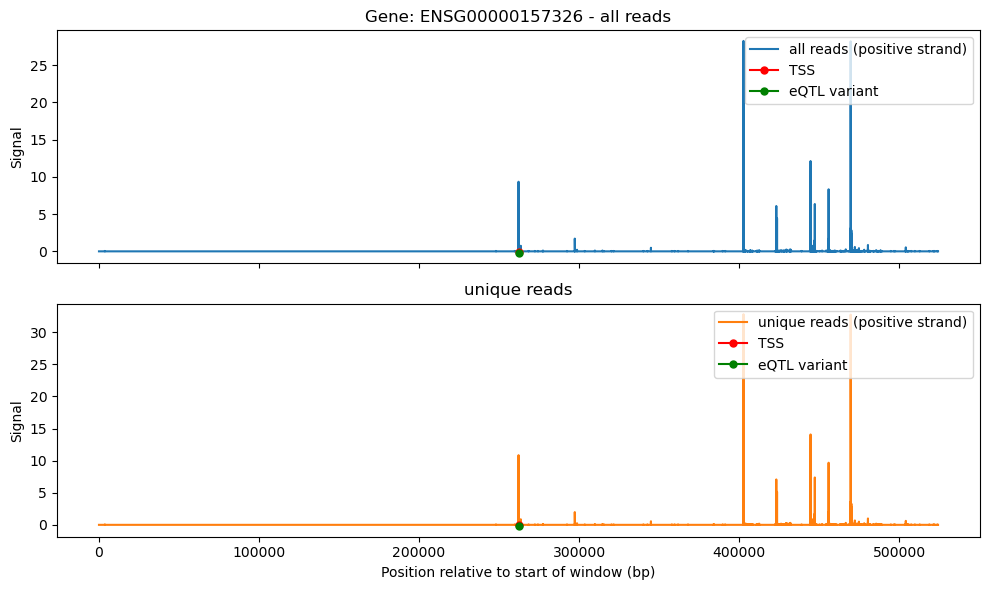

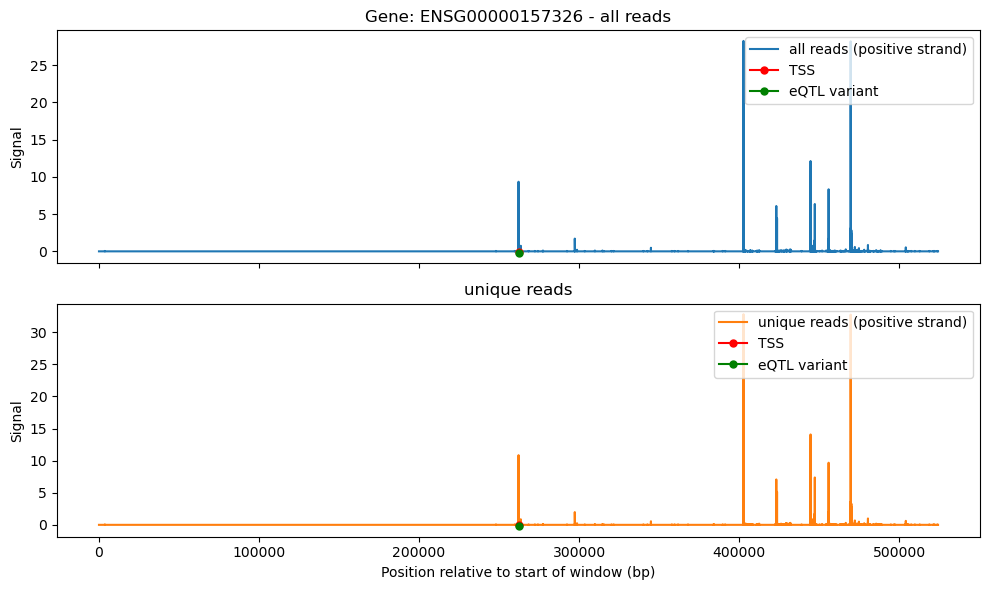

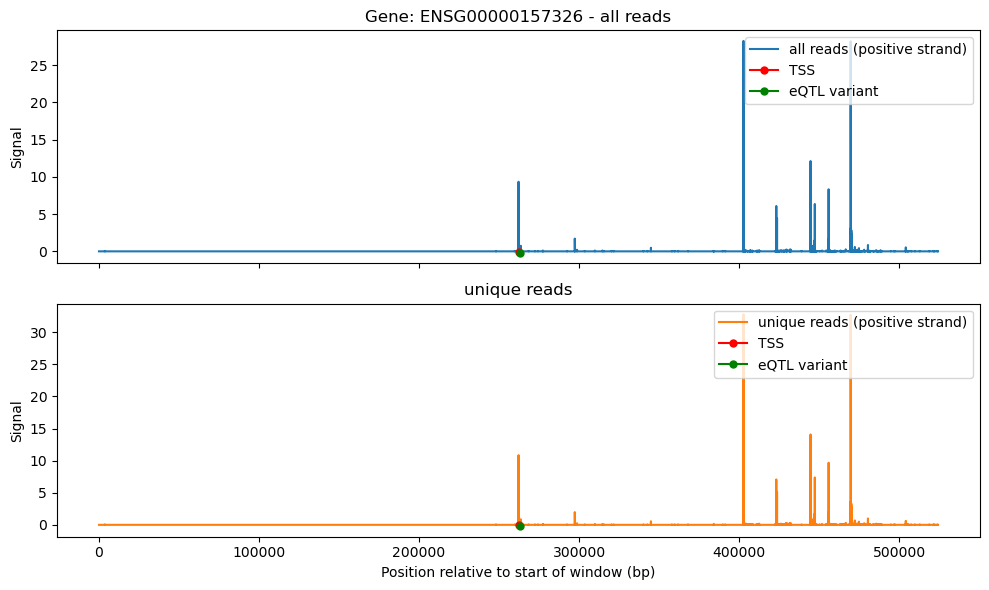

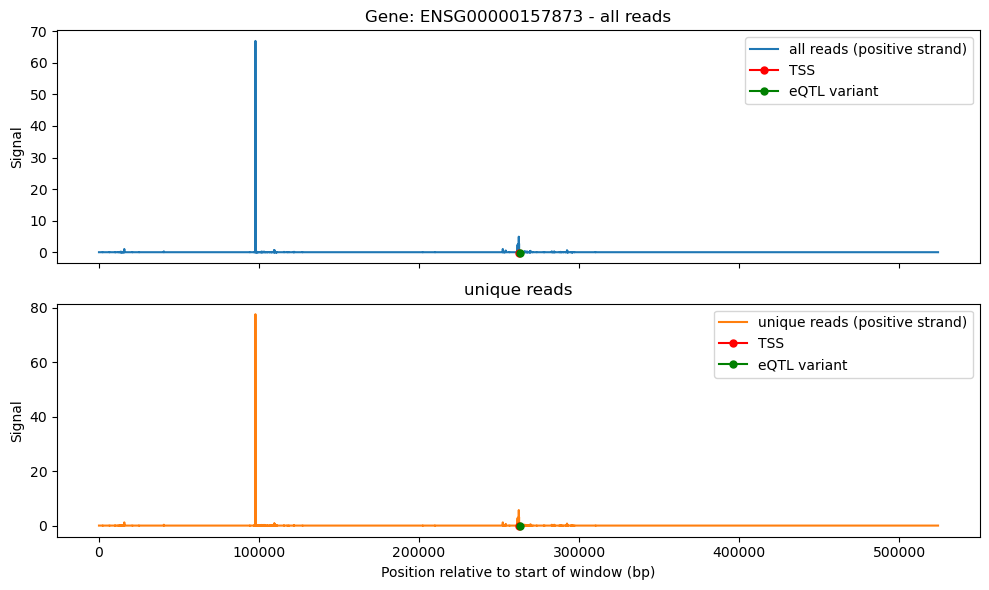

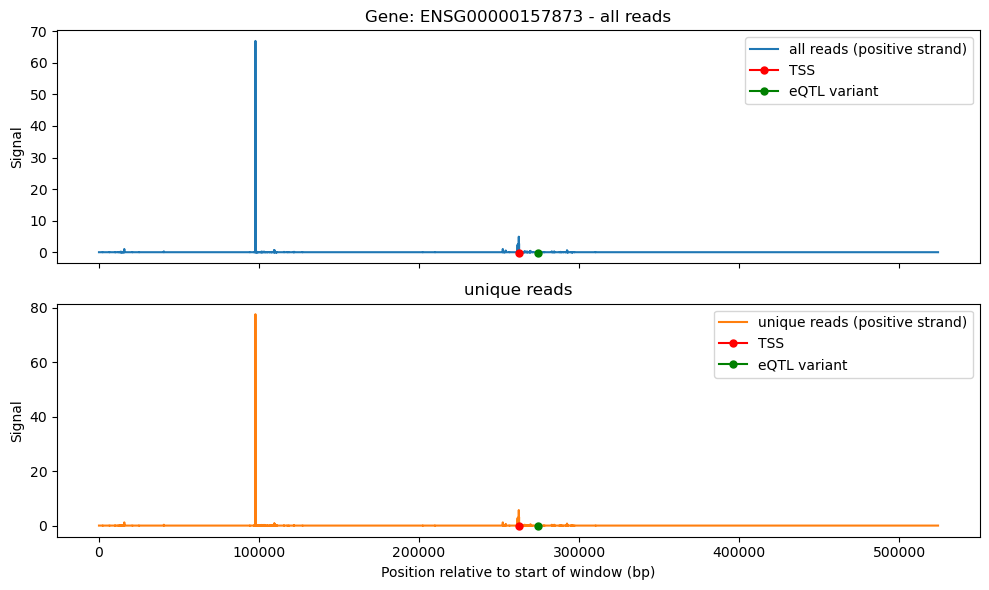

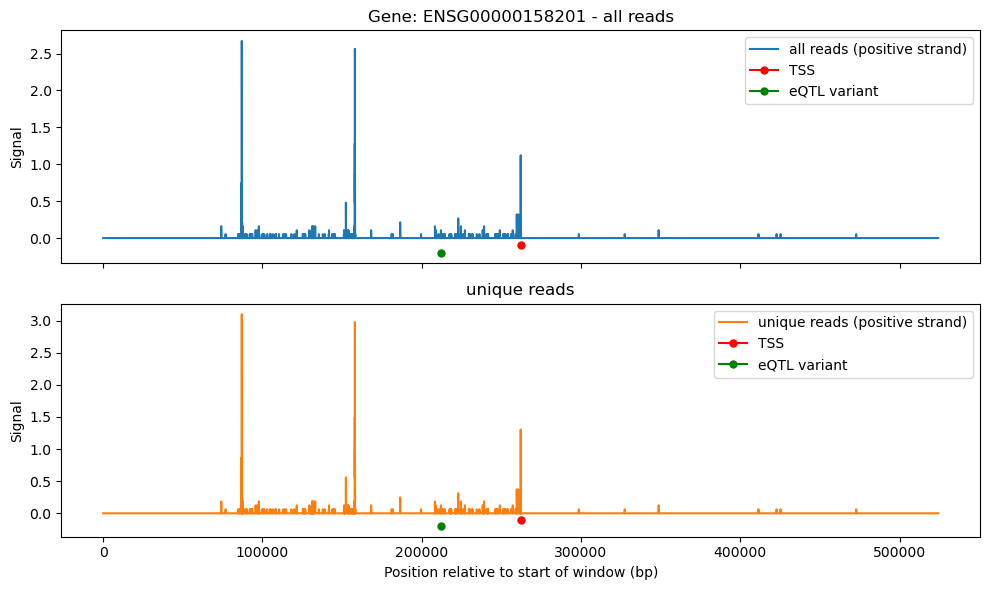

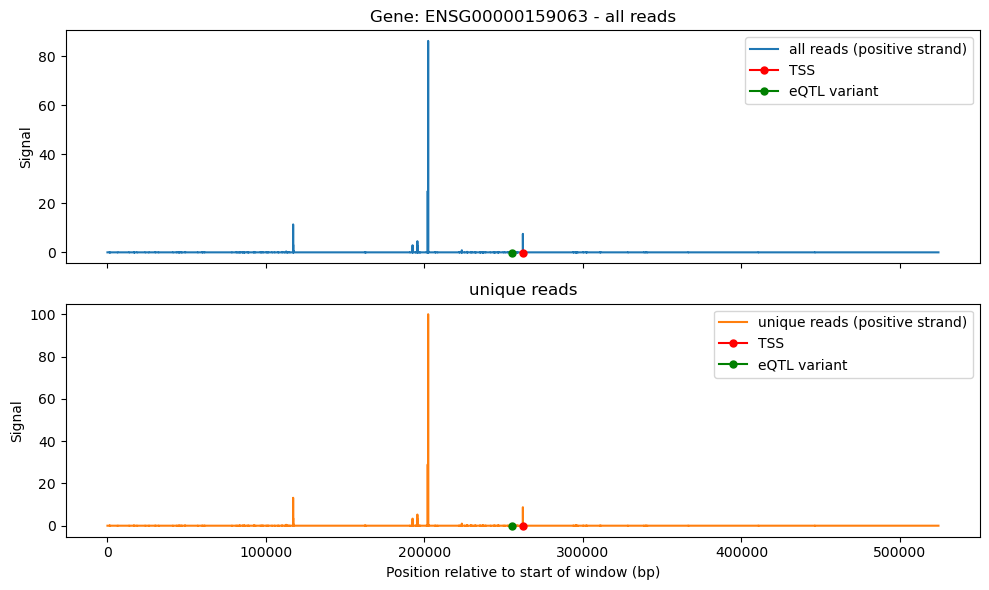

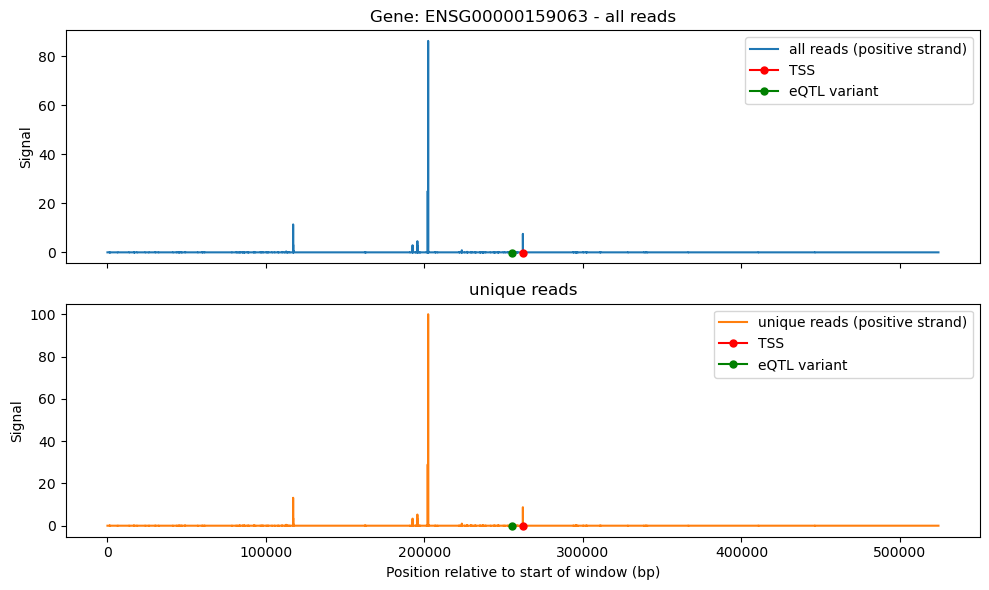

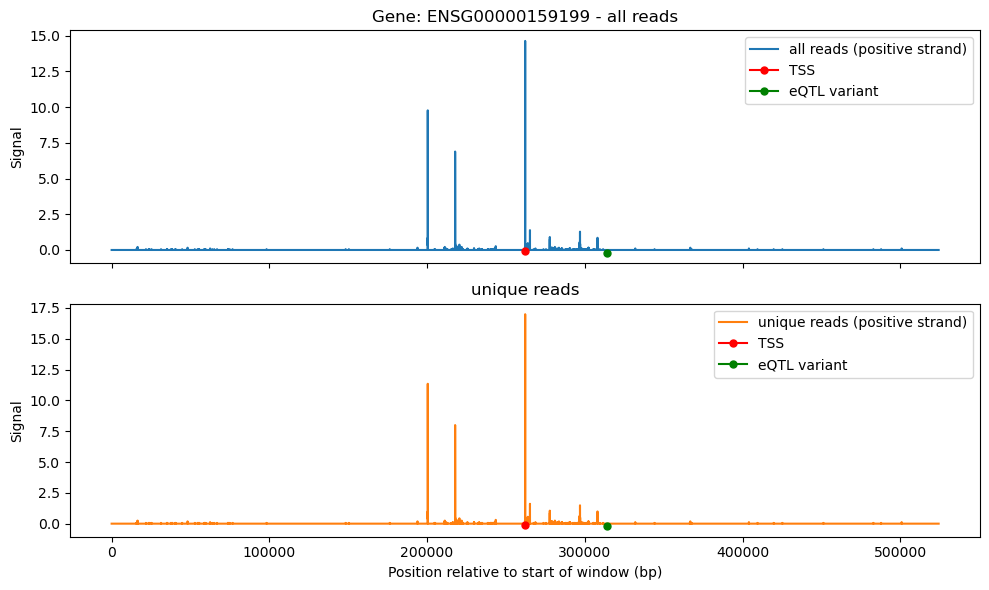

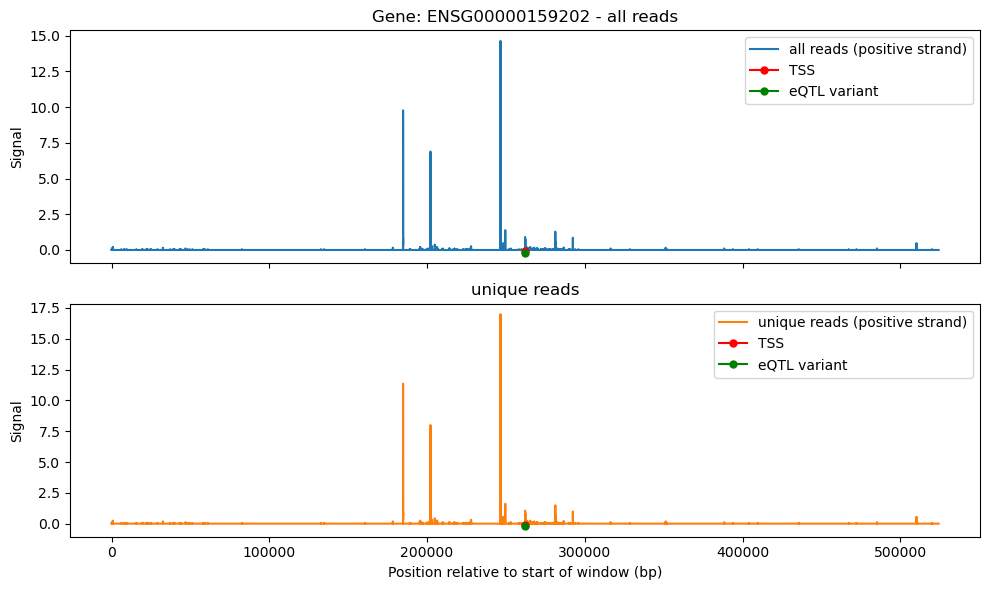

In [79]:
for i in range(10):
    temp = df.iloc[i]
    chrom   = 'X' if temp['chrom']==23 else str(temp['chrom'])
    pos     = temp['qtl_loc'] - 1
    gene_idx= temp['gene_idx']
    tss_loc = geneTSS_dic[ordered_genes[gene_idx]]

    # define window
    halfwin = 524288 // 2
    start   = tss_loc - halfwin
    end     = tss_loc + halfwin

    # load signals
    if temp['strand'] == 1:
        values        = np.nan_to_num(plus_bw.values(f'chr{chrom}', start, end))
        values_unique = np.nan_to_num(plus_bw_unique.values(f'chr{chrom}', start, end))
    else:
        values       = np.nan_to_num(minus_bw.values(f'chr{chrom}', start, end))
        values_unique = np.nan_to_num(minus_bw_unique.values(f'chr{chrom}', start, end))

    # build subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    # top: all reads
    axs[0].plot(values,        label='all reads (positive strand)')
    axs[0].plot(tss_loc - start, -.1, color='red', marker='o', markersize=5, label='TSS')
    axs[0].plot(pos - start, -.2, color='green', marker='o', markersize=5, label='eQTL variant')
    axs[0].set_ylabel('Signal')
    axs[0].set_title(f'Gene: {ordered_genes[gene_idx]} - all reads')
    axs[0].legend(loc='upper right')

    # bottom: unique reads
    axs[1].plot(values_unique, label='unique reads (positive strand)', color='C1')
    axs[1].plot(tss_loc - start, -.1, color='red', marker='o', markersize=5, label='TSS')
    axs[1].plot(pos - start, -.2, color='green', marker='o', markersize=5, label='eQTL variant')
    axs[1].set_xlabel('Position relative to start of window (bp)')
    axs[1].set_ylabel('Signal')
    axs[1].set_title('unique reads')
    axs[1].legend(loc='upper right')

    plt.tight_layout()
    plt.show()

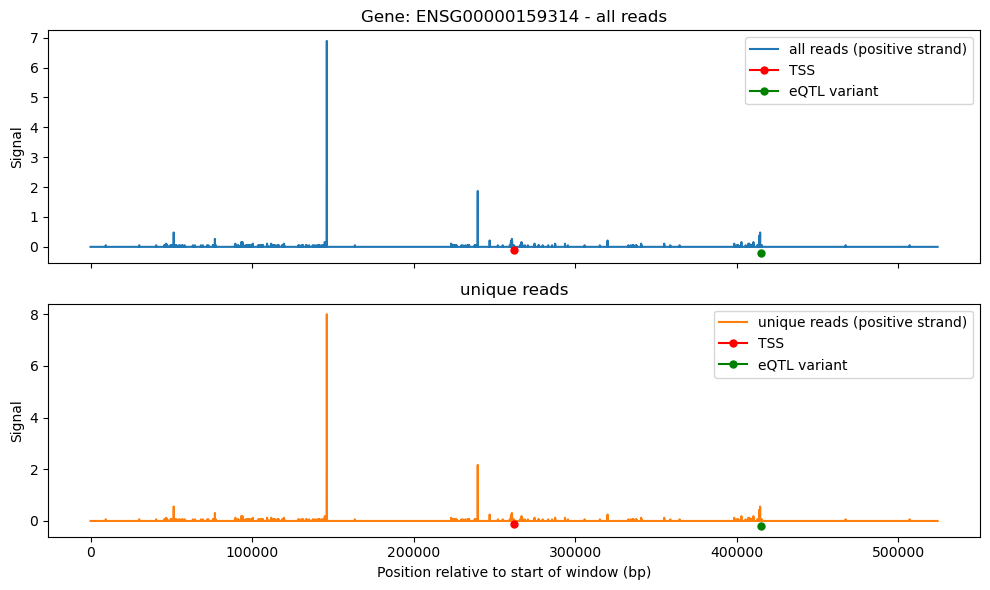

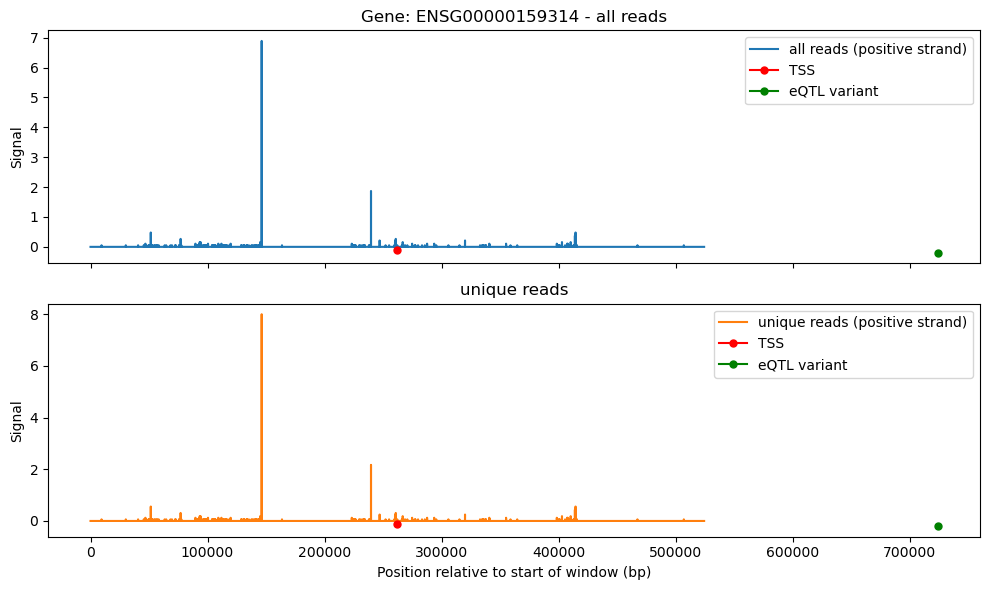

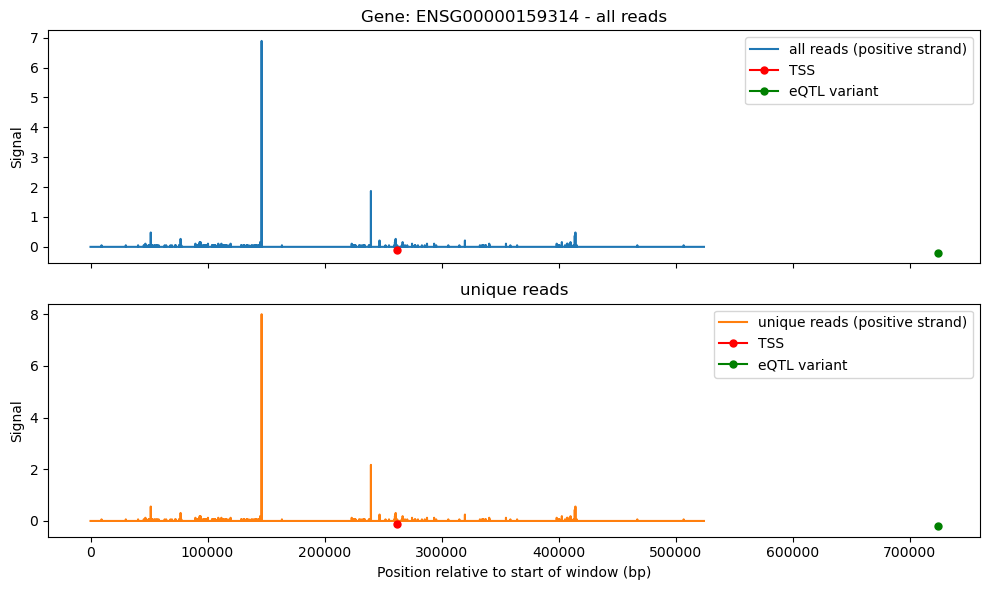

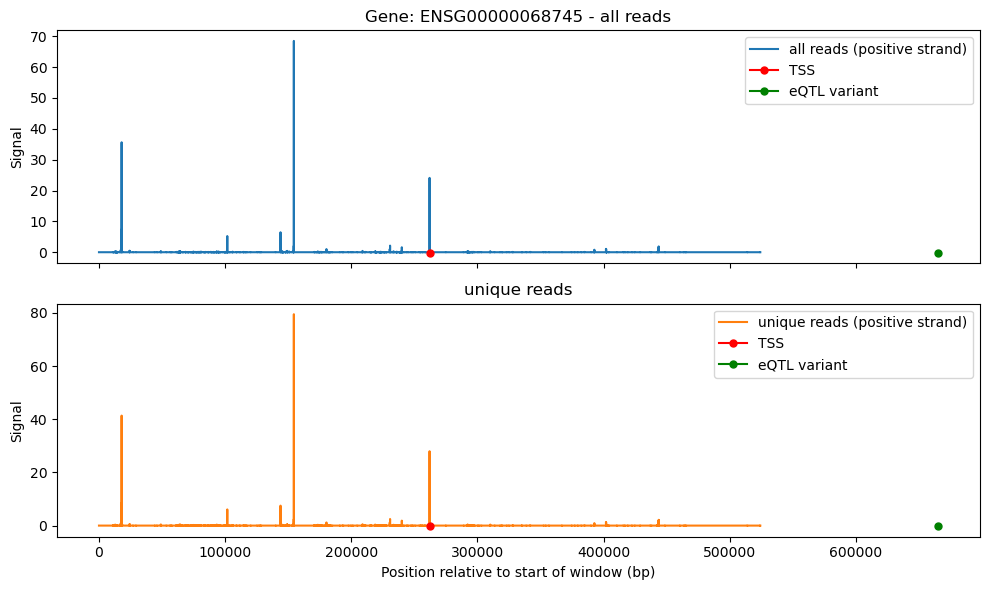

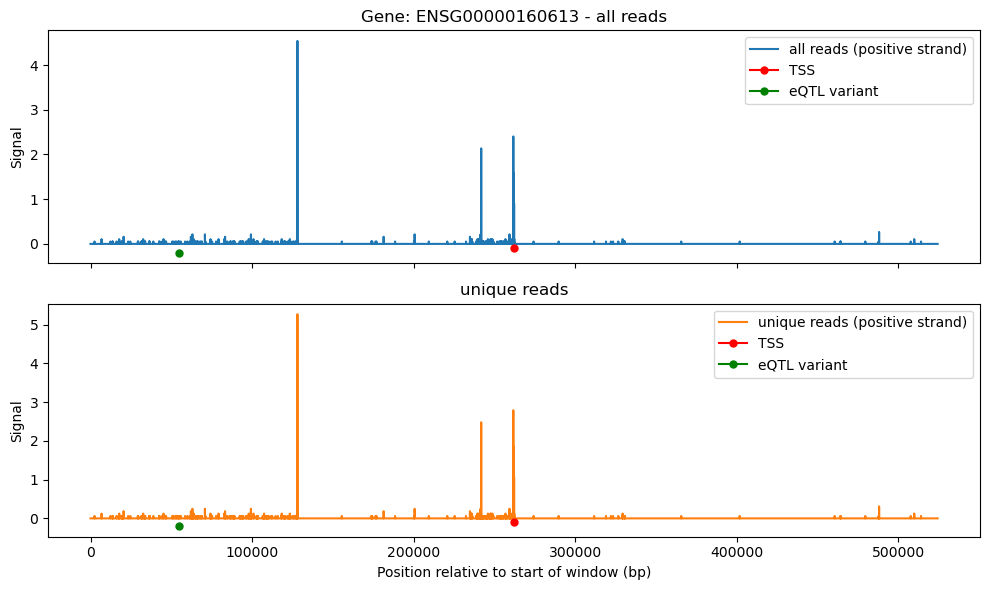

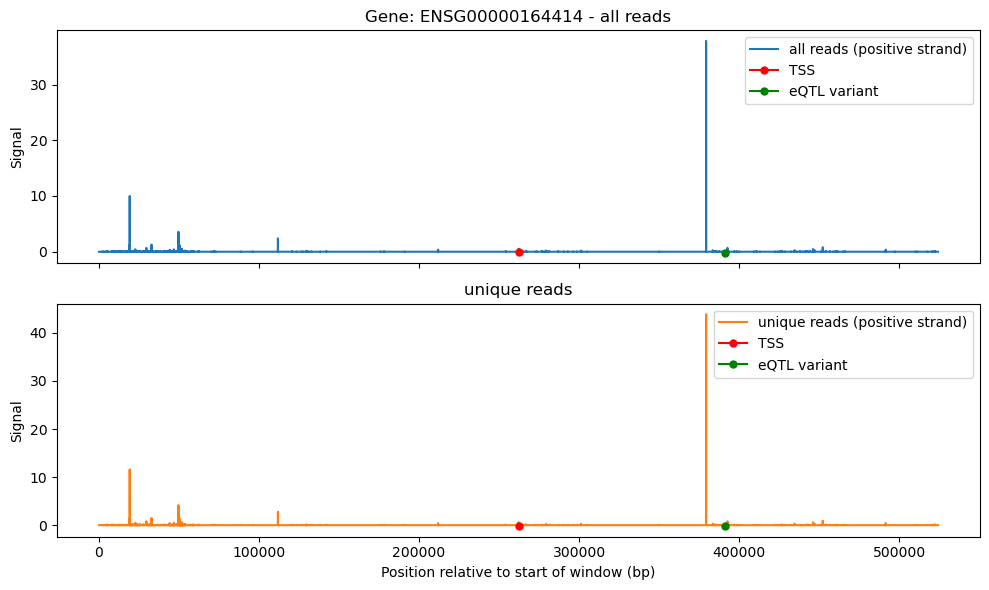

In [80]:
#all and unique reads looks identical
#usually at the TSS there's almost always some signal which is promising! 

for i in range(50):
    temp = df.iloc[i]
    chrom   = 'X' if temp['chrom']==23 else str(temp['chrom'])
    pos     = temp['qtl_loc'] - 1
    gene_idx= temp['gene_idx']
    tss_loc = geneTSS_dic[ordered_genes[gene_idx]]
    
    if np.abs(tss_loc - pos) < 100_000:
        continue

    # define window
    halfwin = 524288 // 2
    start   = tss_loc - halfwin
    end     = tss_loc + halfwin

    # load signals
    if temp['strand'] == 1:
        values        = np.nan_to_num(plus_bw.values(f'chr{chrom}', start, end))
        values_unique = np.nan_to_num(plus_bw_unique.values(f'chr{chrom}', start, end))
    else:
        values       = np.nan_to_num(minus_bw.values(f'chr{chrom}', start, end))
        values_unique = np.nan_to_num(minus_bw_unique.values(f'chr{chrom}', start, end))

    # build subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    # top: all reads
    axs[0].plot(values,        label='all reads (positive strand)')
    axs[0].plot(tss_loc - start, -.1, color='red', marker='o', markersize=5, label='TSS')
    axs[0].plot(pos - start, -.2, color='green', marker='o', markersize=5, label='eQTL variant')
    axs[0].set_ylabel('Signal')
    axs[0].set_title(f'Gene: {ordered_genes[gene_idx]} - all reads')
    axs[0].legend(loc='upper right')

    # bottom: unique reads
    axs[1].plot(values_unique, label='unique reads (positive strand)', color='C1')
    axs[1].plot(tss_loc - start, -.1, color='red', marker='o', markersize=5, label='TSS')
    axs[1].plot(pos - start, -.2, color='green', marker='o', markersize=5, label='eQTL variant')
    axs[1].set_xlabel('Position relative to start of window (bp)')
    axs[1].set_ylabel('Signal')
    axs[1].set_title('unique reads')
    axs[1].legend(loc='upper right')

    plt.tight_layout()
    plt.show()

In [ ]:
#so goal is to see how well it predicts! But we should center it around the actual TSS it effects, not the eQTL itself. 
#should we center it around the eQTL or around the TSS? I don't know, it could be interesting to se how it does in general. Maybe around the TSS is more logical,
#that way still just grab the middle area! 

# making this TSS center approach work

In [5]:
#If center TSS, ahve to make sure we can accurately find the eQTL variant still in the sequence, will be weird since I assume this is also 1 indexed

#but let's center at the TSS for sure!

#let's see if we can do it properly
import pandas as pd
import numpy as np
df = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/eQTL/EPCOTv2_LCLs/LCLs.txt', sep=' ', header=None)
df.columns = ['label', 'qtl_idx', 'gene_idx', 'chrom', 'gene_start', 'gene_end', 'strand', 'qtl_loc', 'ref', 'alt', 'sign_target']

import pickle
base_dir = '/data1/lesliec/sarthak/data/joint_playground/eQTL/EPCOTv2_LCLs/'
with open(base_dir+'genes.pickle', 'rb') as f:
    gene_annotation = pickle.load(f)
ordered_genes = sorted(list(gene_annotation.keys()))

tmpgeneTSS = np.loadtxt(base_dir+'ensemblTSS.txt', dtype='str')
geneTSS_dic = {tmpgeneTSS[i, 0]: int(tmpgeneTSS[i, 1]) for i in range(tmpgeneTSS.shape[0])}

genome_np = '/data1/lesliec/sarthak/data/chrombpnet_test/hg38_tokenized.npz'
with np.load(genome_np) as data:
    genome = {key: np.array(data[key]) for key in data}

temp = df.iloc[0]
chrom   = 'X' if temp['chrom']==23 else str(temp['chrom'])
pos     = temp['qtl_loc'] - 1  # Convert to zero-based index
gene_idx= temp['gene_idx']
tss_loc = geneTSS_dic[ordered_genes[gene_idx]]
# define window
halfwin = 524288 // 2
start   = tss_loc - halfwin
end     = tss_loc + halfwin
seq = genome['chr'+str(chrom)][start:end]
#now get the eQTL variant
eQTL_pos = pos - start  # position of eQTL variant in the sequence
eQTL_variant = seq[eQTL_pos]
eQTL_variant

8

In [7]:
eQTL_pos, pos, start

(262136, 23953726, 23691590)

In [12]:
#let's go through and make sure it matches
mapping = {'A': 7, 'C': 8, 'G': 9, 'T': 10, 'N': 11}
for i in range(df.shape[0]):
    temp = df.iloc[i]
    chrom = temp['chrom']
    if chrom == 23:
        chrom = 'X'
    pos = temp['qtl_loc'] - 1  # Convert to zero-based index
    ref = temp['ref']
    genome_value = genome['chr'+str(chrom)][pos]
    gene_idx = temp['gene_idx']
    tss_loc = geneTSS_dic[ordered_genes[gene_idx]]
    
    # define window
    halfwin = 524288 // 2
    start   = tss_loc - halfwin
    end     = tss_loc + halfwin
    eQTL_pos = pos - start  # position of eQTL variant in the sequence
    seq = genome['chr'+str(chrom)][start:end]
    assert genome_value == mapping[ref], f"Mismatch at index {i}: {genome_value} != {mapping[ref]}"
    if 0 <= eQTL_pos < len(seq):
        eQTL_variant = seq[eQTL_pos]
        assert eQTL_variant == mapping[ref], f"Mismatch at index {i}: {eQTL_variant} != {mapping[ref]}"
        
#ok this approach works perfectly!
#I think what happens is we are 1 indexxed, but then we fixx it by adjusting the position to be 0 based, so it's a little strange, but as long as we are consistent that's what matters

In [13]:
#so now we can effectively identify these variants and do the benchmark!
df

,label,qtl_idx,gene_idx,chrom,gene_start,gene_end,strand,qtl_loc,ref,alt,sign_target
0,0,0,10057,14,23953734,23969279,1,23953727,C,G,-1
1,0,0,10057,14,23953734,23969279,1,23953798,G,A,-1
2,0,0,10057,14,23953734,23969279,1,23954373,A,G,-1
3,0,0,10119,1,2555639,2565382,1,2557169,T,C,1
4,0,0,10119,1,2555639,2565382,1,2568341,G,A,1
...,...,...,...,...,...,...,...,...,...,...,...
1326,1,0,9772,3,12484421,12541549,1,12484507,G,A,1
1327,1,0,9844,14,22773222,22829820,-1,22803905,T,C,1
1328,1,0,9854,9,71911510,71986054,1,71941892,A,G,1
1329,1,0,9921,1,111117163,111140203,-1,111139496,C,T,-1
